In [9]:
import sys
sys.path.append(r'C:\Users\Mechano_2\PycharmProjects\scientificProject')
sys.path

['C:\\Users\\Mechano_2\\PycharmProjects',
 'C:\\Users\\Mechano_2\\anaconda3\\envs\\final\\python37.zip',
 'C:\\Users\\Mechano_2\\anaconda3\\envs\\final\\DLLs',
 'C:\\Users\\Mechano_2\\anaconda3\\envs\\final\\lib',
 'C:\\Users\\Mechano_2\\anaconda3\\envs\\final',
 '',
 'C:\\Users\\Mechano_2\\AppData\\Roaming\\Python\\Python37\\site-packages',
 'C:\\Users\\Mechano_2\\anaconda3\\envs\\final\\lib\\site-packages',
 'c:\\users\\mechano_2\\fairseq',
 'C:\\Users\\Mechano_2\\anaconda3\\envs\\final\\lib\\site-packages\\win32',
 'C:\\Users\\Mechano_2\\anaconda3\\envs\\final\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\Mechano_2\\anaconda3\\envs\\final\\lib\\site-packages\\Pythonwin',
 'C:\\Users\\Mechano_2\\anaconda3\\envs\\final\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\Mechano_2\\.ipython',
 'C:\\Users\\Mechano_2\\PycharmProjects\\scientificProject']

In [8]:
import cv2
import glob
import sys
import os
import numpy as np
import tqdm
from sklearn.model_selection import train_test_split
from tensorflow import keras
from functools import partial
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from scipy.signal import savgol_filter
import scipy

def load_file(path,x,y,x_1,y_1):
    files = glob.glob(path+'./*.jpg')
    if not files:
        print("Chck Phath")
        sys.exit()
    img = []
    for index, i in enumerate(tqdm.tqdm((files))):
        im = cv2.imread(i, cv2.IMREAD_GRAYSCALE)[y:y_1, x:x_1]
        if index == 0:
            ref_img = im
        img.append(np.stack([im, ref_img], axis = 2))
    return np.array(img)

features = load_file('data/ML/', 212-30, 307,412-30,507)
target = np.array(pd.read_csv('data/ML/target.csv', encoding='CP949'))[:,3]
min_max_scaler  = MinMaxScaler()
target = min_max_scaler.fit_transform(target.reshape(-1, 1))
target = savgol_filter(target.flatten(),201,1).reshape(-1, 1)

Chck Phath


SystemExit: 

C:\Users\Mechano_2\anaconda3\envs\final\lib\site-packages\IPython\core\interactiveshell.py:3445: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [4]:
import sys
sys.path

['C:\\Users\\Mechano_2\\PycharmProjects\\scientificProject',
 'C:\\Users\\Mechano_2\\PycharmProjects\\scientificProject',
 'C:\\Users\\Mechano_2\\anaconda3\\envs\\final\\python37.zip',
 'C:\\Users\\Mechano_2\\anaconda3\\envs\\final\\DLLs',
 'C:\\Users\\Mechano_2\\anaconda3\\envs\\final\\lib',
 'C:\\Users\\Mechano_2\\anaconda3\\envs\\final',
 '',
 'C:\\Users\\Mechano_2\\AppData\\Roaming\\Python\\Python37\\site-packages',
 'C:\\Users\\Mechano_2\\anaconda3\\envs\\final\\lib\\site-packages',
 'c:\\users\\mechano_2\\fairseq',
 'C:\\Users\\Mechano_2\\anaconda3\\envs\\final\\lib\\site-packages\\win32',
 'C:\\Users\\Mechano_2\\anaconda3\\envs\\final\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\Mechano_2\\anaconda3\\envs\\final\\lib\\site-packages\\Pythonwin',
 'C:\\Users\\Mechano_2\\anaconda3\\envs\\final\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\Mechano_2\\.ipython',
 'C:\\Program Files\\JetBrains\\PyCharm 2021.1.1\\plugins\\python\\helpers\\pydev',
 'C:\\Program Files\\JetBra

In [3]:
X_train,  X_valid, y_train, y_valid = train_test_split(features, target, test_size=0.15, random_state=0)

In [17]:
X_train = X_train[3000:3001] /255.0
X_train = X_train.astype(np.float32)
import tensorflow as tf
X_train = tf.convert_to_tensor(X_train)
X_train

<tf.Tensor: shape=(1, 200, 200, 2), dtype=float32, numpy=
array([[[[0.3529412 , 0.3647059 ],
         [0.3529412 , 0.34509805],
         [0.36078432, 0.34509805],
         ...,
         [0.3529412 , 0.34117648],
         [0.35686275, 0.34901962],
         [0.34117648, 0.34509805]],

        [[0.35686275, 0.34901962],
         [0.3529412 , 0.3529412 ],
         [0.34509805, 0.35686275],
         ...,
         [0.34509805, 0.34117648],
         [0.3372549 , 0.34509805],
         [0.35686275, 0.34901962]],

        [[0.34509805, 0.3647059 ],
         [0.34901962, 0.3647059 ],
         [0.3372549 , 0.37254903],
         ...,
         [0.3529412 , 0.33333334],
         [0.34117648, 0.3372549 ],
         [0.35686275, 0.3372549 ]],

        ...,

        [[0.34509805, 0.36862746],
         [0.34901962, 0.3647059 ],
         [0.34509805, 0.36078432],
         ...,
         [0.36862746, 0.32156864],
         [0.3529412 , 0.3529412 ],
         [0.36078432, 0.34901962]],

        [[0.35686275, 0.

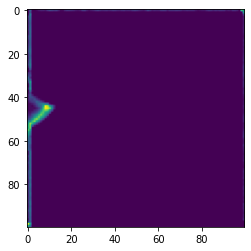

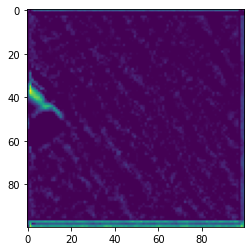

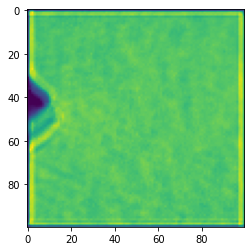

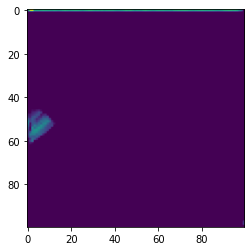

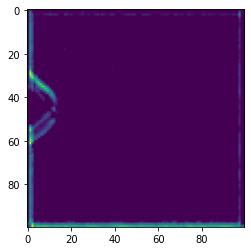

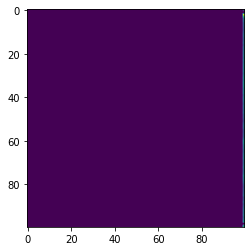

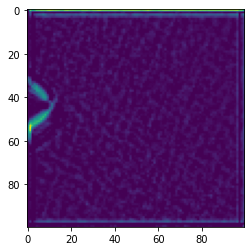

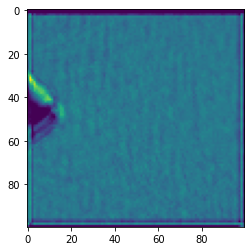

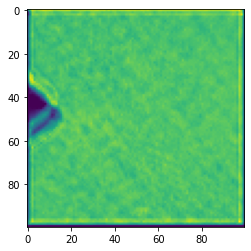

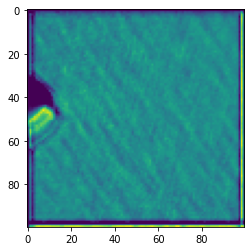

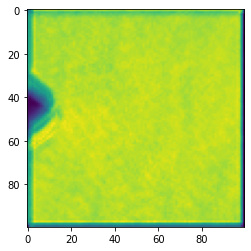

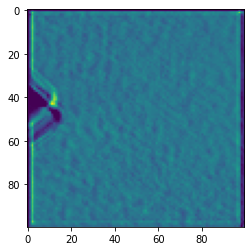

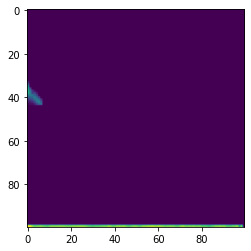

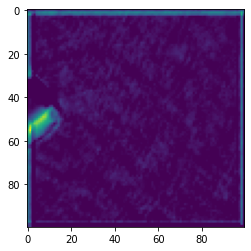

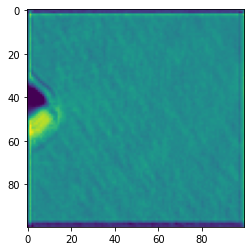

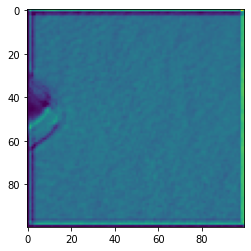

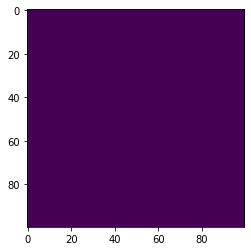

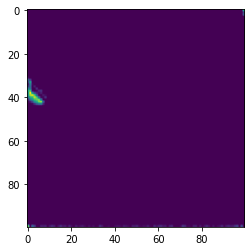

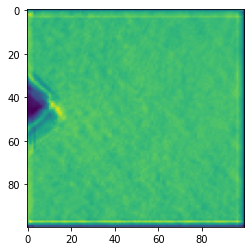

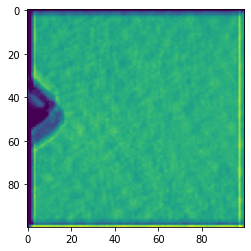

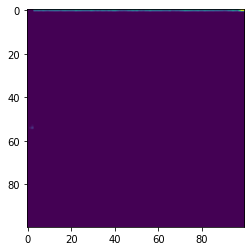

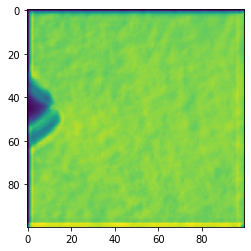

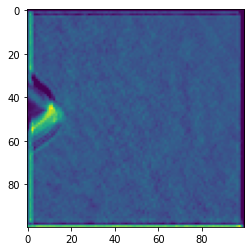

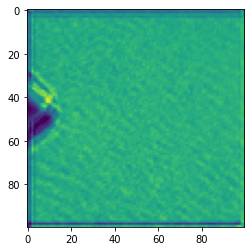

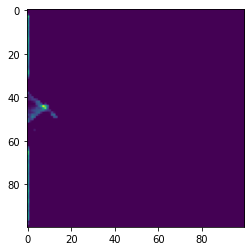

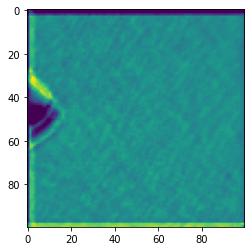

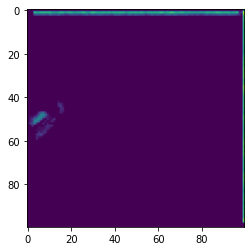

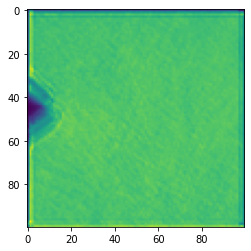

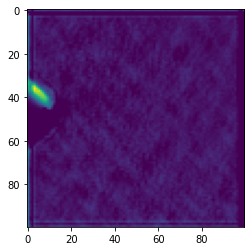

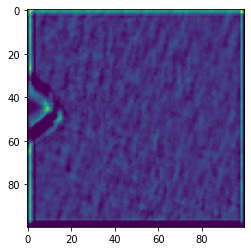

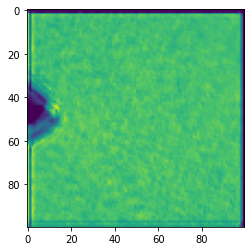

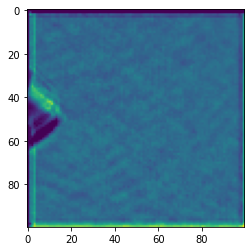

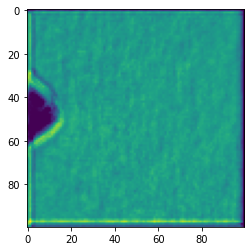

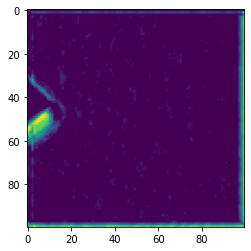

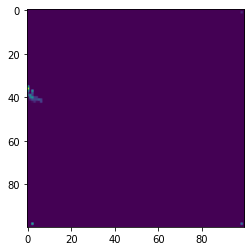

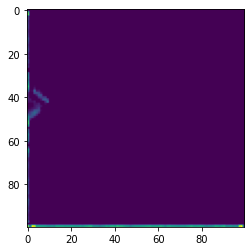

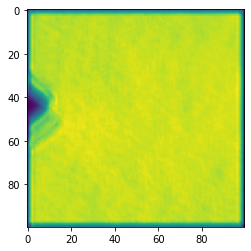

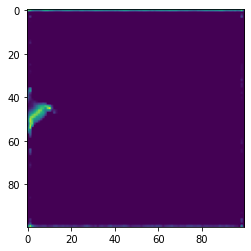

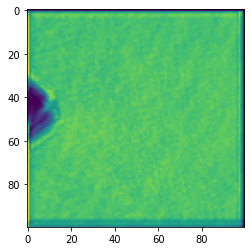

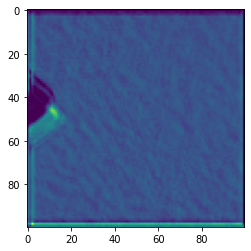

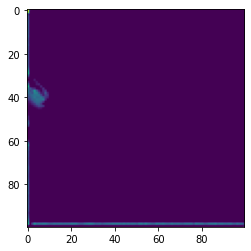

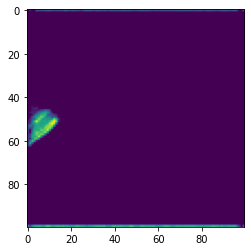

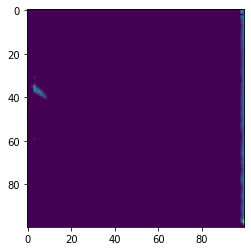

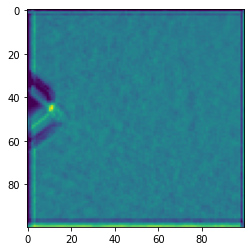

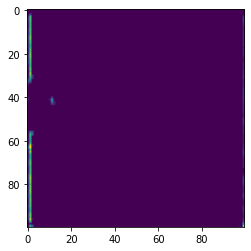

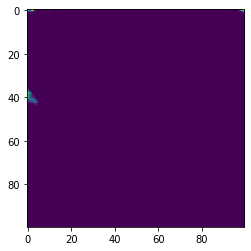

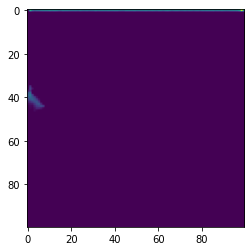

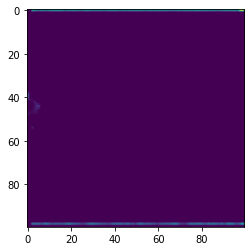

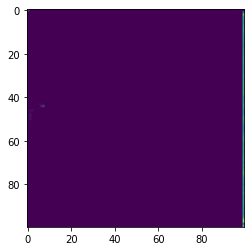

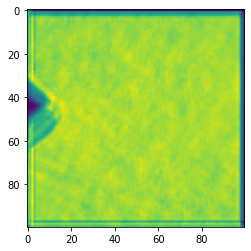

In [63]:
DefaultConv2D = partial(keras.layers.Conv2D,
                        kernel_size=3, activation='relu', padding="SAME")
a = DefaultConv2D(filters=64, kernel_size=7, input_shape=[200, 200, 2])(X_train)
b = keras.layers.MaxPooling2D(pool_size=2)(a)
c = DefaultConv2D(filters=128)(b)
d = DefaultConv2D(filters=128)(c)
e = keras.layers.MaxPooling2D(pool_size=2)(d)
f = DefaultConv2D(filters=256)(e)
g = DefaultConv2D(filters=256)(f)
h = keras.layers.MaxPooling2D(pool_size=2)(g)
array = d.numpy()[0]
import matplotlib.pyplot as plt
for i in range(20,70):
    plt.imshow(array[:,:,i])
    plt.show()
    plt.close()

---
# Fig. feature

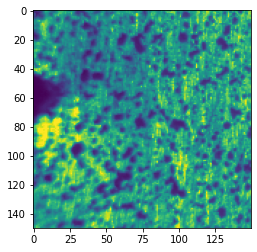

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import io


ml = cv2.imread('data/ML/ff0001.jpg',cv2.IMREAD_GRAYSCALE)[407-75:407+75,211-50:211+100]
ml_deformed = cv2.imread('data/ML/ff3638.jpg',cv2.IMREAD_GRAYSCALE)[407-75:407+75,211-50:211+100]
black = cv2.imread('data/DIC/ff00001.jpg',cv2.IMREAD_GRAYSCALE)[295-75:295+75,217-50:217+100]
black_deformed = cv2.imread('data/DIC/ff03574.jpg',cv2.IMREAD_GRAYSCALE)[295-75:295+75,217-50:217+100]

field = ml[30:-30, 50:-10]
x = np.linspace(0, np.shape(field)[1], np.shape(field)[1])
y = np.linspace(0, np.shape(field)[0], np.shape(field)[0])
X, Y = np.meshgrid(x, y)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"},figsize=(5,5) )
ax.plot_surface(X, Y, black[30:-30, 30:-30], cmap='magma', edgecolor=None)
ax.set_xlabel('X (Pixel)')
ax.set_ylabel('Y (Pixel)')
ax.set_zlabel('Pixel Value')
ax.view_init(35)
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
plt.savefig('./figure/fig1a_1.png',dpi=300,bbox_inches='tight')
plt.show()
plt.close()

fig, ax = plt.subplots(subplot_kw={"projection": "3d"},figsize=(5,5))
ax.plot_surface(X, Y, field, cmap='magma', edgecolor=None)
ax.set_xlabel('X (Pixel)')
ax.set_ylabel('Y (Pixel)')
ax.set_zlabel('Pixel Value')
ax.view_init(35)
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
plt.savefig('./figure/fig1a_2.png',dpi=300,bbox_inches='tight')
plt.show()
plt.close()

In [30]:
dst = np.where(ml>97, 255,0)
plt.imshow(dst,cmap='gray')
plt.show()
plt.close()


plt.imshow(ml_deformed,cmap='gray')
plt.show()
plt.close()

(140, 110)

In [ ]:
plt.imshow(black_deformed,cmap='gray')


In [ ]:
import cv2
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import cv2
import numpy as np
import matplotlib.pyplot as plt

min= MinMaxScaler()
ml = cv2.imread('data/ML/ff0001.jpg',cv2.IMREAD_GRAYSCALE)[407-75:407+75,211-50:211+100]
ml_deformed = cv2.imread('data/ML/ff2144.jpg',cv2.IMREAD_GRAYSCALE)[407-75:407+75,211-50:211+100]
black = cv2.imread('data/DIC/ff00001.jpg',cv2.IMREAD_GRAYSCALE)[295-75:295+75,217-50:217+100]
black_deformed = cv2.imread('data/DIC/ff02255.jpg',cv2.IMREAD_GRAYSCALE)[295-75:295+75,217-50:217+100]

def histogram(img, img2):
    fig, ax = plt.subplots()
    sns.kdeplot(data=img.ravel(),color='red',label='Ref',ax=ax)
    sns.kdeplot(data=img2.ravel(),label='Deformed',ax=ax)

    plt.ylabel('number of pixel')
    plt.xlabel('pixel value')

    # ax.set_xlim(80,100)
    # plt.savefig('ml_hist.png',bbox='tight')
    plt.show()
    plt.close()
histogram(ml, ml_deformed)

In [ ]:
histogram(black, black_deformed)

In [ ]:
plt.imshow(black)

In [ ]:
plt.imshow(black_deformed)

In [ ]:
plt.imshow(ml)

In [ ]:
plt.imshow(ml_deformed)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

path = './default/'
training_loss = np.load(path+'DIC_training_loss.npy')
test_loss = np.load(path+'DIC_test_loss.npy')
ml_training_loss=np.load(path+'ml_training_loss.npy')
ml_testing_loss=np.load(path+'test_loss.npy')


fig, ax = plt.subplots(figsize=(10,5) )
ax.plot(ml_training_loss,label='ML image train loss')
ax.plot(ml_testing_loss,label='ML image validation loss')
ax.plot(training_loss,label='Speckle image train loss')
ax.plot(test_loss, label='Validation image train loss')
ax.legend()
ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
ax.set_ylim(0,0.02)
plt.savefig('./figure/loss.png',dpi=300,bbox_inches='tight')
plt.show()
plt.close()

In [ ]:
np.min(test_loss)